In [109]:
from scipy.stats import johnsonsb
from scipy.stats import beta
import numpy as np
import seaborn as sns

# badweather - johnson SB (low: 8.68133, upper: 412.07762, s1: 1.73355, s2: .85421)
# mean: 74.63

# goodweather - log logistic (loc:0, scale: 23,21313, shape: 6.06776)
# mean: 24.26
n = 10000

#badweather = johnsonsb.rvs(.85421, 1.73355, size=n)
badweather = np.random.normal(74.63,58.076,n)

#goodweather = np.random.logistic(0,23.21313, 1000)
goodweather = np.random.normal(24.26,8.268,n) 

for i in range(0,len(goodweather)):
    if goodweather[i] < 0:
        goodweather[i] = 0
        
for i in range(0,len(badweather)):
    if badweather[i] < 0:
        badweather[i] = 0
        
dayisgood = np.random.binomial(size=n, n=1, p= 0.878)

mergedistn = np.zeros(n)

badmettarget = 0
goodmettarget = 0
gooddays = 0
for i in range(n):
    if dayisgood[i] == 1:
        mergedistn[i]=(round(goodweather[i],2))
        gooddays = gooddays + 1
        if goodweather[i] <= 40:
            goodmettarget = goodmettarget + 1
    else:
        mergedistn[i]=(round(badweather[i],2))
        if badweather[i] <= 40:
            badmettarget = badmettarget + 1
            
mettarget = 0
for i in range(n):
    if mergedistn[i] <= 40:
        mettarget = mettarget + 1

percentgoodweather = 100 * gooddays / n
percentsuccess = 100 * mettarget / n
percentsuccessgood = 100 * goodmettarget / n
percentsuccessbad = 100 * badmettarget / n

print("-------------------GoodWeather----------------------")
print("Flights: ", gooddays, "(", percentgoodweather, "% )")
print("Successful Flights (RET <=40): ", goodmettarget, "(",percentsuccessgood,"% )")

print("Average RET: ",goodweather.mean())
print("")
print("-------------------BadWeather-----------------------")
print("Flights: ", n - gooddays, "(", round((100-percentgoodweather),2), "% )")
print("Successful Flights (RET <=40): ", badmettarget, "(",percentsuccessbad,"% )")
print("Average RET: ",badweather.mean())
print("")
print("----------------------Total-------------------------")
print("Flights: ", n, "( 100.00 % )")
print("Successful Flights(RET <=40): ", mettarget, "(",percentsuccess,"% )")
print("Overall Average RET: ",mergedistn.mean())
#print("Good Weather Day? - ", dayisgood)
#print("Day Averages: ", mergedistn)




-------------------GoodWeather----------------------
Flights:  8801 ( 88.01 % )
Successful Flights (RET <=40):  8539 ( 85.39 % )
Average RET:  24.2247121958

-------------------BadWeather-----------------------
Flights:  1199 ( 11.99 % )
Successful Flights (RET <=40):  344 ( 3.44 % )
Average RET:  77.9897864687

----------------------Total-------------------------
Flights:  10000 ( 100.00 % )
Successful Flights(RET <=40):  8883 ( 88.83 % )
Overall Average RET:  30.876056


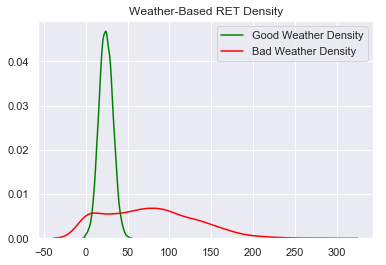

In [107]:
scaledgoodweather = goodweather[0:gooddays]
scaledbadweather = badweather[0:(n-gooddays)]



sns.set(color_codes=True)
goodplot = sns.distplot(scaledgoodweather, hist=False, color = 'Green', label="Good Weather Density")
badplot = sns.distplot(scaledbadweather, hist=False, color = 'Red',label="Bad Weather Density")

goodplot.set_title('Weather-Based RET Density')

plt.show()

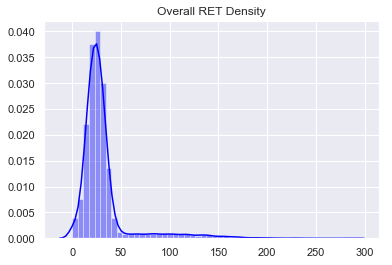

In [108]:
mergedplot = sns.distplot(mergedistn, color = 'Blue')
mergedplot.set_title('Overall RET Density')
plt.show()